In [ ]:
"""Analysis Of Titanic dataset by Data visuaization and ML"""

In [1]:
"""DATA CLEANING AND A BIT EDA"""

'DATA CLEANING AND A BIT EDA'

In [2]:
#Project inititation
"""
Importing libraries
importing dataframes
"""

'\nImporting libraries\nimporting dataframes\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
#project planning
"""
Understand nature of data using .info(), .describe()
Make histograms and boxplots(more graphs)
Value counts
Missing data(data cleaning)
Explore interesting details like:
    1)wealthy survive
    2)survival rate by location
    3)survival rate by gender and age
    4)Total spent?
    5)Age scatterplot with ticket price
preprocess data together
    use label for train and test
Model baseline
Model comparision with CV
Train model on training data
"""

'\nUnderstand nature of data using .info(), .describe()\nMake histograms and boxplots(more graphs)\nValue counts\nMissing data(data cleaning)\nExplore interesting details like:\n    1)wealthy survive\n    2)survival rate by location\n    3)survival rate by gender and age\n    4)Total spent?\n    5)Age scatterplot with ticket price\npreprocess data together\n    use label for train and test\nModel baseline\nModel comparision with CV\nTrain model on training data\n'

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['PassengerId']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#dropping undesired data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['PassengerId']

def clean(data):
    data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
    cols = ['SibSp', 'Parch', 'Fare', 'Age']
    for col in cols:
        data[col].fillna(data[col].median(), inplace = True)
    data.Embarked.fillna('U', inplace = True)
    return data
    #for testing data
train = clean(train)
test = clean(test)

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.841838,12.703770,0.896760,0.981429,55.850103
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.471875
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
# Checking for missing data in the dataset
print(train.isna().sum().sort_values())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [9]:
#pivot table
pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


In [10]:
#Data visualisation on surface
"""
1)How many people die by gender(male and female)
2)How many people die on basis of age
"""

'\n1)How many people die by gender(male and female)\n2)How many people die on basis of age\n'

In [11]:
train['Survived'].value_counts()
#549 died and 342 survived

0    549
1    342
Name: Survived, dtype: int64

In [12]:
#Making pivot table
pivot = pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])
pivot

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


In [13]:
"""DATA VISUALIZATION"""

'DATA VISUALIZATION'

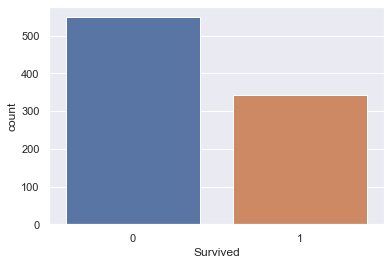

In [14]:
sns.set()
sns.countplot(data = train, x = 'Survived')
plt.show()

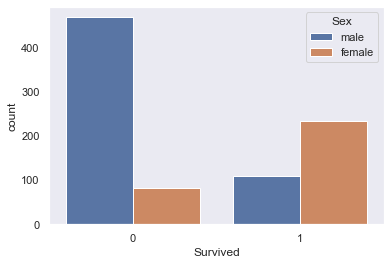

In [15]:
sns.set_style('dark')
sns.countplot(data = train, x = 'Survived', hue = 'Sex')
plt.show()
#More males died than females and more females survived than males

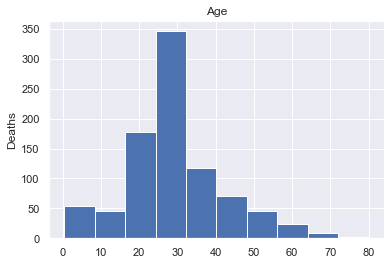

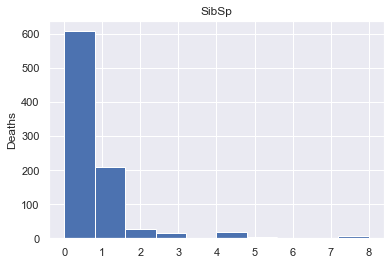

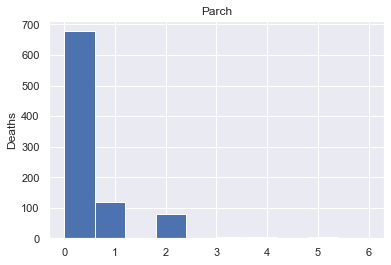

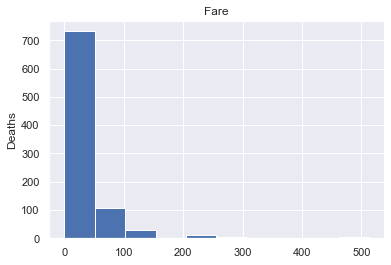

In [16]:
new_df = train[['Age', 'SibSp','Parch', 'Fare']]
sns.set()
for i in new_df.columns:
    plt.hist(new_df[i])
    plt.title(i)
    plt.ylabel('Deaths')
    plt.show()
#People between the age of 20-30 died the most


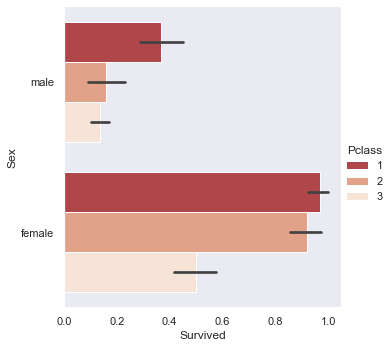

In [17]:
#Catplot
#ne_cat = train_df[['Survived','PClass','Sex','Tickect','Cabin','Embarked']]
sns.set_palette('RdBu')
sns.set_style('dark')
sns.catplot(data = train,x = 'Survived', y = 'Sex', hue = 'Pclass', kind = 'bar')
plt.show()
#People of Pclass 1 survived more irrespectice of gender than Pclass = 2 and Pclass =3

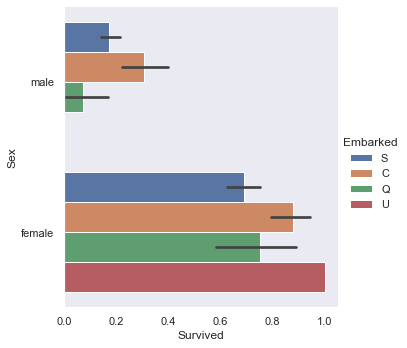

In [18]:
sns.set()
sns.set_style('dark')
sns.catplot(data = train,x = 'Survived', y = 'Sex', hue = 'Embarked', kind = 'bar')
plt.show()
# People who embarked from Cherbourg survived the most followed by Southhampton and Queenstown

In [19]:
"""
After data visualisation the conclusion points are
1)Overall more people died than the no. of people survived.
2)More mails die than female
3)People in the age group of 20-30 are mostly dead among the passengers
4)Passengers of 1st class survived among the 3 classes of people
5)People who embarked from Southhampten are the most dead among passengers who are from Cherbourg and Queenstown
"""

'\nAfter data visualisation the conclusion points are\n1)Overall more people died than the no. of people survived.\n2)More mails die than female\n3)People in the age group of 20-30 are mostly dead among the passengers\n4)Passengers of 1st class survived among the 3 classes of people\n5)People who embarked from Southhampten are the most dead among passengers who are from Cherbourg and Queenstown\n'

In [20]:
"""MACHINE LEARNING PART"""
#Youtube video link : https://www.youtube.com/watch?v=pUSi5xexT4Q

'MACHINE LEARNING PART'

In [4]:
#Training model 
# Target variable  = survived
# Features: Sex, Age, Pclass, Embarked 
# Finding correlations
columns = ['Age', 'Pclass','Survived','Fare']
subset = train[columns]
subset.corr()

,Age,Pclass,Survived,Fare
Age,1.000000,-0.369226,-0.077221,0.096067
Pclass,-0.369226,1.000000,-0.338481,-0.549500
Survived,-0.077221,-0.338481,1.000000,0.257307
Fare,0.096067,-0.549500,0.257307,1.000000


In [22]:
# Converting sex from male and femaler to catagorical vairable/LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Sex', 'Embarked']
for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
train.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [23]:
# defining target variable and feature from train_df


In [32]:
# splitting dataset into training and testing data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

y = train['Survived']
X = train.drop('Survived', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'n_estimators':[1000,2000,2500,3000],
          'max_depth':[2,4,6,8,10,12,14],
}
gs = GridSearchCV


In [33]:
#instantatung the model(beacuse target variable is catagorical)
rf = RandomForestClassifier(random_state = 42, min_samples_leaf = 0.2, max_depth = 10, n_estimators = 500)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.7723880597014925


In [26]:
submit = logreg.predict(test)

In [27]:
df = pd.DataFrame({'PassengerId':test_ids.values,
                  'Survived':submit})

In [28]:
df.to_csv('submission.csv', index = False)

In [29]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\HP'